# importing libraries

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib .pyplot as plt
import joblib as jb 
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import KNNImputer
from sklearn .model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')


# Data Read 

In [2]:
# increase the default column
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [3]:
df=pd.read_csv('D:/DS NOTE/my projects/files/train/raw/train.csv')
df

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,6822,johnson&johnson,Irrelevant,Offend Ugandan moms and soon become moms... Af...
1,8286,Microsoft,Negative,"in Apparently Microsoft is buying the TikTok, ..."
2,4322,CS-GO,Neutral,. NEW VIDEO!.. Getting bullied again on CSGO.....
3,2329,CallOfDuty,Positive,A good little session on COD before - complete...
4,1543,Battlefield,Irrelevant,Thanks to Captain @R_FL3X last night as for th...
...,...,...,...,...
37335,6200,FIFA,Negative,Never been more disinterested here in Fifa and...
37336,2497,Borderlands,Neutral,"The best deals so far: FIFA 20 $18, Borderland..."
37337,9608,PlayStation5(PS5),Negative,God when...
37338,10134,PlayerUnknownsBattlegrounds(PUBG),Neutral,When . } Then .


# Data preprocessing 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37340 entries, 0 to 37339
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   2401                                                   37340 non-null  int64 
 1   Borderlands                                            37340 non-null  object
 2   Positive                                               37340 non-null  object
 3   im getting on borderlands and i will murder you all ,  37025 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.1+ MB


In [5]:
# Return boolean Series denoting duplicate rows
df.duplicated().sum() 

757

In [6]:
#Return DataFrame with duplicate rows removed
df.drop_duplicates()


,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,6822,johnson&johnson,Irrelevant,Offend Ugandan moms and soon become moms... Af...
1,8286,Microsoft,Negative,"in Apparently Microsoft is buying the TikTok, ..."
2,4322,CS-GO,Neutral,. NEW VIDEO!.. Getting bullied again on CSGO.....
3,2329,CallOfDuty,Positive,A good little session on COD before - complete...
4,1543,Battlefield,Irrelevant,Thanks to Captain @R_FL3X last night as for th...
...,...,...,...,...
37335,6200,FIFA,Negative,Never been more disinterested here in Fifa and...
37336,2497,Borderlands,Neutral,"The best deals so far: FIFA 20 $18, Borderland..."
37337,9608,PlayStation5(PS5),Negative,God when...
37338,10134,PlayerUnknownsBattlegrounds(PUBG),Neutral,When . } Then .


In [7]:
# Detect missing values
df.isnull().sum()

2401                                                       0
Borderlands                                                0
Positive                                                   0
im getting on borderlands and i will murder you all ,    315
dtype: int64

In [8]:
# Generate descriptive statistics.
df.describe()

,2401
count,37340.000000
mean,6446.643091
std,3739.416380
min,1.000000
25%,3202.000000
50%,6439.500000
75%,9615.000000
max,13200.000000


In [9]:
df['Positive'].value_counts()

Positive
Negative      11371
Positive      10394
Neutral        9261
Irrelevant     6314
Name: count, dtype: int64

In [10]:
df['Positive']=df['Positive'].replace({'Positive':0,'Negative':1,'Irrelevant':2,'Neutral':3})
df['Positive']

0        2
1        1
2        3
3        0
4        2
        ..
37335    1
37336    3
37337    1
37338    3
37339    3
Name: Positive, Length: 37340, dtype: int64

# Data split

In [11]:
df1=df.copy()
X=df1.drop('Positive',axis=1).copy()
Y=df1['Positive'].copy()

In [12]:
X

,2401,Borderlands,"im getting on borderlands and i will murder you all ,"
0,6822,johnson&johnson,Offend Ugandan moms and soon become moms... Af...
1,8286,Microsoft,"in Apparently Microsoft is buying the TikTok, ..."
2,4322,CS-GO,. NEW VIDEO!.. Getting bullied again on CSGO.....
3,2329,CallOfDuty,A good little session on COD before - complete...
4,1543,Battlefield,Thanks to Captain @R_FL3X last night as for th...
...,...,...,...
37335,6200,FIFA,Never been more disinterested here in Fifa and...
37336,2497,Borderlands,"The best deals so far: FIFA 20 $18, Borderland..."
37337,9608,PlayStation5(PS5),God when...
37338,10134,PlayerUnknownsBattlegrounds(PUBG),When . } Then .


In [13]:
Y

0        2
1        1
2        3
3        0
4        2
        ..
37335    1
37336    3
37337    1
37338    3
37339    3
Name: Positive, Length: 37340, dtype: int64

In [14]:
# To change categorical data to numerical data  for purpose of replace null value
# because imputation cannot replace categorical data null value 

# Feature encoding 

In [15]:
ordinal= OrdinalEncoder()
ordinal_encode=ordinal.fit(X)
ordinal_encode

OrdinalEncoder()

In [16]:
jb.dump(ordinal_encode,'D:/DS NOTE/my projects/files/train/model/ordinal_encode_model.pkl') 

['D:/DS NOTE/my projects/files/train/model/ordinal_encode_model.pkl']

In [17]:
ordinal_encode=ordinal.transform(X)
ordinal_encode_df=pd.DataFrame(ordinal_encode,columns=X.columns)
ordinal_encode_df

,2401,Borderlands,"im getting on borderlands and i will murder you all ,"
0,6477.0,31.0,21624.0
1,7912.0,19.0,32855.0
2,4137.0,5.0,655.0
3,2236.0,6.0,6117.0
4,1467.0,3.0,25564.0
...,...,...,...
37335,5895.0,10.0,20691.0
37336,2398.0,4.0,26224.0
37337,9183.0,23.0,11905.0
37338,9684.0,24.0,29595.0


In [18]:
ordinal_encode_df.to_csv('D:/DS NOTE/my projects/files/train/process/ordinal_encode_df_train.csv',index=False)

# Null/na value can replace by using method of imputation 

In [19]:

knn=KNNImputer()
knn_impute=knn.fit(ordinal_encode_df)
knn_impute

KNNImputer()

In [20]:
jb.dump(knn_impute,'D:/DS NOTE/my projects/files/train/model/knn_impute_model.pkl') 


['D:/DS NOTE/my projects/files/train/model/knn_impute_model.pkl']

In [21]:
knn_impute=knn.transform(ordinal_encode_df)
knn_impute_df=pd.DataFrame(knn_impute,columns=ordinal_encode_df.columns)
knn_impute_df

,2401,Borderlands,"im getting on borderlands and i will murder you all ,"
0,6477.0,31.0,21624.0
1,7912.0,19.0,32855.0
2,4137.0,5.0,655.0
3,2236.0,6.0,6117.0
4,1467.0,3.0,25564.0
...,...,...,...
37335,5895.0,10.0,20691.0
37336,2398.0,4.0,26224.0
37337,9183.0,23.0,11905.0
37338,9684.0,24.0,29595.0


In [22]:
knn_impute_df.to_csv('D:/DS NOTE/my projects/files/train/process/knn_impute_df_train.csv',index=False)


In [23]:
# After imputation null can replace ,
knn_impute_df.isnull().sum()

2401                                                     0
Borderlands                                              0
im getting on borderlands and i will murder you all ,    0
dtype: int64

# Outlier detecting by boxplot 


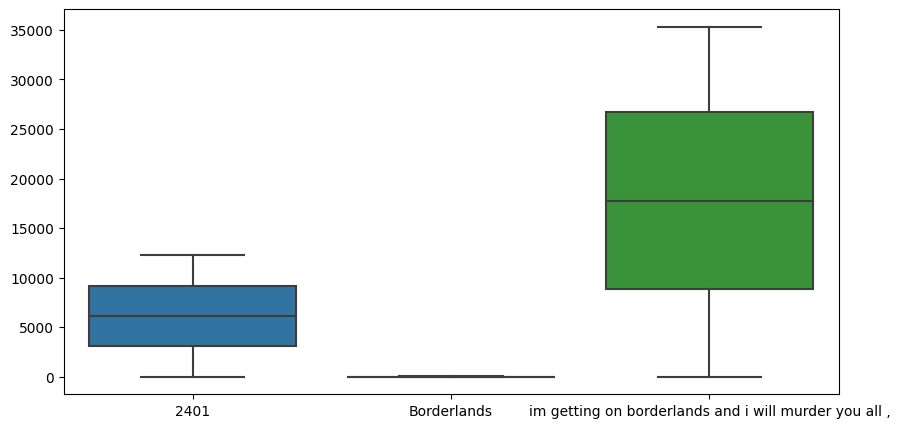

In [24]:
plt.figure(figsize=(10,5))
sns.boxplot(knn_impute_df)
plt.show()

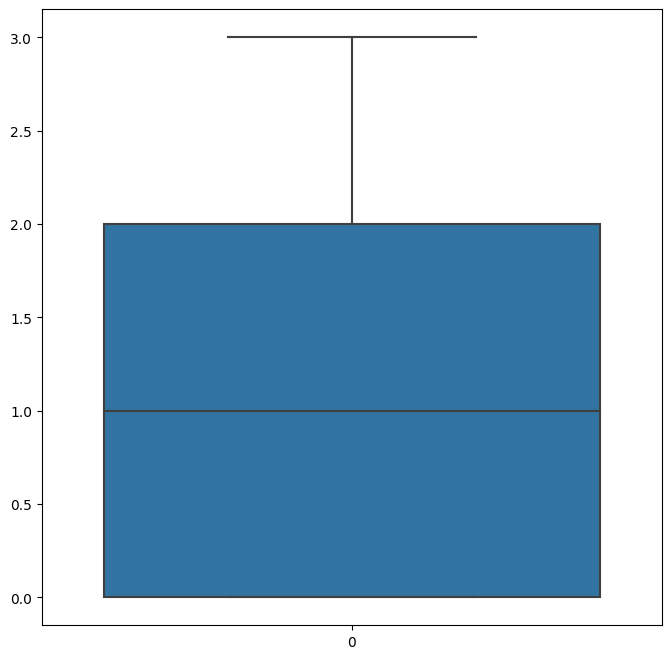

In [25]:
plt.figure(figsize=(8,8))
sns.boxplot(Y)
plt.show()

In [26]:
# there is no outlier in this data set 

In [27]:
# Compute pairwise correlation of columns, excluding NA/null values

In [28]:
combined_df = pd.concat([knn_impute_df, Y], axis=1)
correlation_matrix = combined_df.corr()

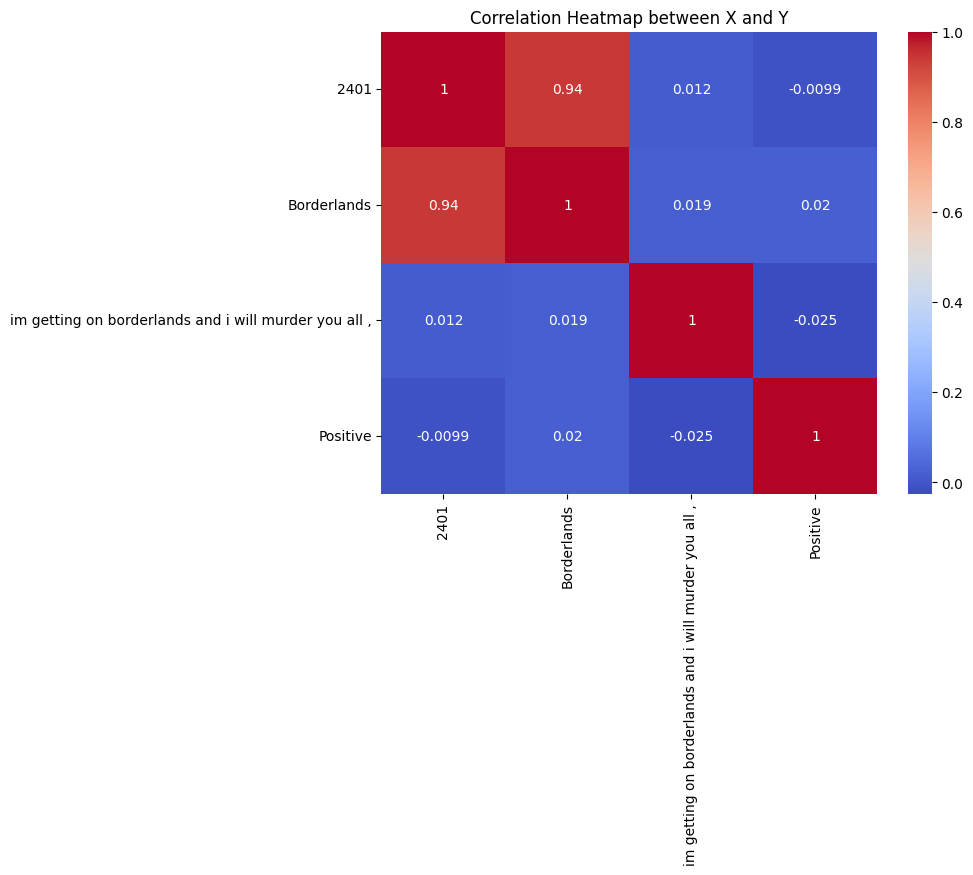

In [29]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap between X and Y")
plt.show()

In [30]:
x_train,x_test,y_train,y_test=train_test_split(knn_impute_df,Y,train_size=0.5,shuffle=True ,random_state=120)

In [31]:
x_train.to_csv('D:/DS NOTE/my projects/files/train/raw/x_train.csv',index=False)
y_train.to_csv('D:/DS NOTE/my projects/files/train/raw/y_train.csv',index=False)

In [32]:
x_test.to_csv('D:/DS NOTE/my projects/files/evaluate/raw/x_test.csv',index=False)
y_test.to_csv('D:/DS NOTE/my projects/files/evaluate/raw/y_test.csv',index=False)

# Model training 

In [33]:

rf=RandomForestRegressor()
rf.fit(x_train,y_train)
print('Train score:',rf.score(x_train,y_train)* 100)  

Train score: 92.07885178297619


In [34]:
jb.dump(rf,'D:/DS NOTE/my projects/files/train/model/rf.pkl')


['D:/DS NOTE/my projects/files/train/model/rf.pkl']

# Model Hyperparameter tunning

# Prediction

In [35]:
##load x test and y test 
imputer_model=jb.load('D:/DS NOTE/my projects/files/train/model/knn_impute_model.pkl') 
encode_model=jb.load('D:/DS NOTE/my projects/files/train/model/ordinal_encode_model.pkl') 
model=jb.load('D:/DS NOTE/my projects/files/train/model/rf.pkl')

In [36]:
y_pred = pd.DataFrame(model.predict(x_test))
y_pred 

,0
0,2.30
1,0.96
2,1.87
3,0.70
4,1.94
...,...
18665,0.72
18666,1.23
18667,0.80
18668,2.69


              precision    recall  f1-score   support

           0       0.89      0.40      0.56      5281
           1       0.34      0.98      0.50      5621
           2       0.00      0.00      0.00      3174
           3       0.00      0.00      0.00      4594

    accuracy                           0.41     18670
   macro avg       0.31      0.35      0.26     18670
weighted avg       0.35      0.41      0.31     18670



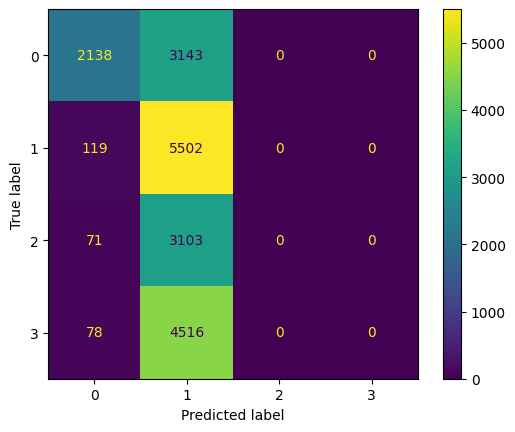

In [39]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Convert continuous predictions to class labels using a threshold
threshold = 0.5
y_pred_labels = np.where(y_pred >= threshold, 1, 0)  # Adjust for your threshold and classes

# Calculate classification metrics
classification_rep = classification_report(y_test, y_pred_labels)
print(classification_rep)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_labels)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
